# 531 - Lab 1 - Visualizing world health data

There are two versions of this lab, one in Python and one in R.
The R lab will use `ggplot` and the Python lab will use `Altair`.

This is the Python version.

Please choose a version to complete, though keep in mind that you are required to alternate between completing the R labs and the Python labs to get experience using both languages.

<div class="alert alert-info" style="color:black">

## Submission instructions
rubric={mechanics:2}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab.</li>
  <li>Upload a <code>.html</code> version of your assignment to Canvas.
    <ul>
      <li> Either manually or using the last cell of this notebook.</li>
    </ul>
  </li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

YOUR REPO LINK GOES HERE

In [1]:
# Run this cell to ensure that altair plots show up in the exported HTML
# and that the R cell magic works
import altair as alt
alt.data_transformers.disable_max_rows()

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')


DataTransformerRegistry.enable('data_server')

# 1. Get motivated!

You have already worked with the Gapminder world health data set in the previous block
and we will revisit an updated version of it in this lab.
The Gapminder foundation strives to educate people about the public health status
in countries all around the world
and fight devastating misconceptions that hinder world development.
This information is important both for our capacity to make considerate choices as individuals,
and from an industry perspective in understanding where markets are emerging.
In their research,
Gapminder has discovered that most people don't really know what the world looks like today.
Do you?
[Take this 7-8 min quiz to find out](https://forms.gapminder.org/s3/test-2018).

This quiz is not easy,
so don't worry if you get a low score.
I took this quiz for the first time a few years back and I didn't do too well myself =)
It is primarily meant to spark your curiosity to learn more about this lab's data set!
When you are done,
[please submit your score in this Google form](https://docs.google.com/forms/d/e/1FAIpQLSc2B0wlF-QWqAeJnHbu534WT-Twhpetk_4uUMM3LZvV0wv0mg/viewform?usp=sf_link).
This is anonymous,
I just want to explore if we can use the the distribution of scores
for something interesting in class or future labs.

<div class="alert alert-info" style="color:black">

### Question 1.1
rubric={reasoning:1,writing:1}

<p>To answer the first lab question
<a href=https://www.youtube.com/watch?v=usdJgEwMinM>watch this 20 min video of Hans Rosling</a>
a public health professor at Karolinska Institute
who founded Gapminder together with his son and his son's wife.
Although the video is almost 15 years old,
it is a formidable demonstration on how to present data in a way that engages your audience
while conveying a strong, important message.
(The original clip has over 3 million views,
but I linked you one of better video quality).</p>

<p>Briefly describe (&lt;=90 words)
what you think is the most important message conveyed in the video
and which data visualization you think was the most effective
in getting this message across to the viewers.</p>
    
</div>

1.1 Answer: I think the most important message is that most lower income countries have made impressive advances in health and GDP over the last few decades to become more similar to higher income countries than many of us realize. The visualization detailing life expectancy at birth vs. fertility rate does a great job of showing how lower income countries have migrated to be more like higher income countries in this regard over time. I really enjoyed the interactive component of the visualization as is showed the process occurring over time.

# 2. The Gapminder bubble chart

The "bubble chart" have become quite famous from their appearance in the Gapminder talks,
and are widely used in other areas as well.
Let's start by recreating a simple version of this chart ourselves!

There will be some data wrangling involved in this lab,
and since 531 is primarily about visualization and this is the first lab,
I will give you some hints for most data wrangling parts of this lab.
Often I will link documentation or StackOverflow,
so that you get practice finding information on these sources,
and sometimes you will need to search them yourself if I haven't included a link.

To make this more interesting,
I have compiled a more recent version of the Gapminder dataset,
which contains values up until 2018 for most of the features.
We will not use all the columns in the data set,
but here is a description of what they contain
that you can refer back to throughout the lab.

| Column                | Description                                                                                  |
|-----------------------|----------------------------------------------------------------------------------------------|
| country               | Country name                                                                                 |
| year                  | Year of observation                                                                          |
| population            | Population in the country at each year                                                       |
| region                | Continent the country belongs to                                                             |
| sub_region            | Sub-region the country belongs to                                                            |
| income_group          | Income group [as specified by the world bank in 2018]                                                |
| life_expectancy       | The mean number of years a newborn would <br>live if mortality patterns remained constant    |
| income                | GDP per capita (in USD) <em>adjusted <br>for differences in purchasing power</em>            |
| children_per_woman    | Average number of children born per woman                                                    |
| child_mortality       | Deaths of children under 5 years <break>of age per 1000 live births                          |
| pop_density           | Average number of people per km<sup>2</sup>                                                  |
| co2_per_capita        | CO2 emissions from fossil fuels (tonnes per capita)                                          |
| years_in_school_men   | Mean number of years in primary, secondary,<br>and tertiary school for 25-36 years old men   |
| years_in_school_women | Mean number of years in primary, secondary,<br>and tertiary school for 25-36 years old women |

[as specified by the world bank in 2018]: https://datahelpdesk.worldbank.org/knowledgebase/articles/378833-how-are-the-income-group-thresholds-determined

<div class="alert alert-info" style="color:black">

### Question 2
rubric={accuracy:1,quality:1,viz:2}

<h4>Python</h4>
<ol type="1">
<li>I have uploaded the <a href=https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv> 2018 Gapminder data at this URL.</a> Use <code>read_csv</code> from <code>pandas</code> to load the data directly from the URL and assign it a suitable variable name. Set the <code>parse_dates</code> parameter to <code>['year']</code> to ensure that Altair recognizes this columns as time data.</li>
<li>Now let’s create a similar bubble chart to what you saw in the video:
<ul>
<li>Filter the dataframe to only keep observations from a single year, 1962. You can create a new data frame variable or perform the filtering directly as you pass the data to Altair. Dates can be matched as strings when filtering.</li>
<li>Use a circle mark to recreate the appearance of the plot in the video.</li>
<li>Encode the proper variables so that children per woman is on the x-axis, life expectancy on the y-axis, and so that the circles’ color corresponds to their region, and the size reflects the population.</li>
</ul></li>
</ol>
<p> Don't worry about getting axis labels and sizes to be exactly like in the video,
we will return to this code later in the lab to customize it.</p>
</div>

In [2]:
# YOUR PYTHON ANSWER GOES HERE
import pandas as pd
gm = pd.read_csv("https://raw.githubusercontent.com/UofTCoders/workshops-dc-py/master/data/processed/world-data-gapminder.csv",
                 parse_dates = ['year'])
# explore the dataset
gm.head()



,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
0,Afghanistan,1800-01-01,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN,NaN,NaN
1,Afghanistan,1801-01-01,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN,NaN,NaN
2,Afghanistan,1802-01-01,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN,NaN,NaN
3,Afghanistan,1803-01-01,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN,NaN,NaN
4,Afghanistan,1804-01-01,3280000,Asia,Southern Asia,Low,28.2,603,7.0,469.0,NaN,NaN,NaN,NaN


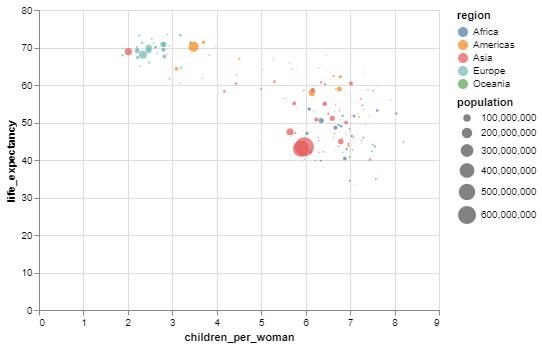

In [3]:
# Filter dataset to only include year 1962.
gm62 = gm[gm.year == '1962']
chart = alt.Chart(gm62).mark_circle().encode(alt.X('children_per_woman'), alt.Y('life_expectancy'), 
        alt.Color('region'), alt.Size('population'))
chart

# 3. Education balance

A common misconception is that women around the world go to school many years less than men. Let’s find out what the data actually says about this.

<div class="alert alert-info" style="color:black">

### Question 3
rubric={accuracy:2,quality:1,viz:2}

<h4>
Python
</h4>
<ol type="1">
<li>Compute a new column in your dataframe that represents the ratio between the number of years in school for women and men (calculate it so that the value 1 means as many years for both, and 0.5 means half as many for women compared to men).</li>
<li>Filter the dataframe to only contain value from 1970 - 2015, since those are the years where the education data has been recorded. Again you can either create a new variable or perform the filtering as you pass the data to the plotting function.</li>
<li>Create a line plot showing how the ratio of women’s of men’s years in school has changed over time. Group the data by income group and plot the mean for each group.</li>
<li>Use layering to add a square mark for every data point in your line plot (so one per yearly mean in each group).</li>
</ol>

</div>

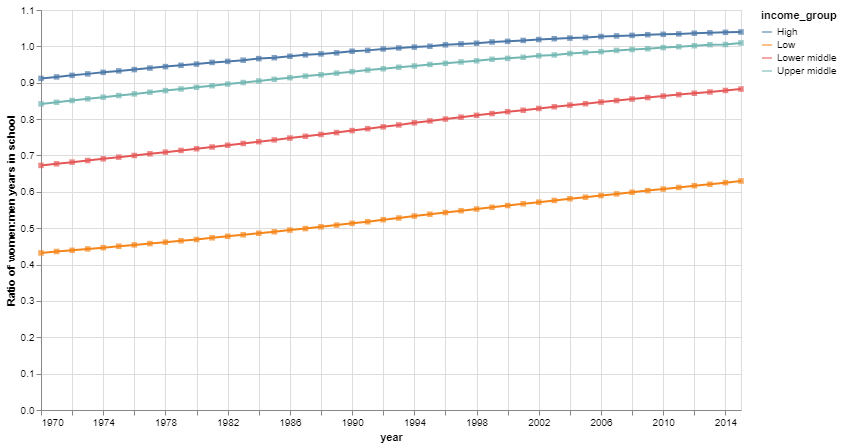

In [4]:
# YOUR PYTHON ANSWER GOES HERE

# Create new column in the original dataframe as ratio of years in school women:men.
gm['years_in_school_w:m'] = gm['years_in_school_women']/gm['years_in_school_men']
# Filter dataframe to only include years between and including 1970 and 2015.
gm70_15 = gm[(gm.year >= '1970') & (gm.year <= '2015')]
# Create new dataframe showing each income group's mean years in school ratio for each year. 
gm_edu_mean = gm70_15.groupby(['year', 'income_group'])['years_in_school_w:m'].mean().reset_index()
# Chart the dataframe above with a line.
edu_chart = alt.Chart(gm_edu_mean).mark_line().encode(alt.X('year'), 
            alt.Y('years_in_school_w:m', title='Ratio of women:men years in school'), 
            alt.Color('income_group')).properties(width=700, height=400)
# Chart the dataframe above with squares.
edu_square = alt.Chart(gm_edu_mean).mark_square().encode(alt.X('year'), 
             alt.Y('years_in_school_w:m', title='Ratio of women:men years in school'), 
             alt.Color('income_group')).properties(width=700, height=400)
# Combine the two charts. 
edu_chart + edu_square





<div class="alert alert-warning" style="color:black">

### Question 3.1 (Optional)
rubric={accuracy:1}

<h4>
Python
</h4>
Add <a href=https://altair-viz.github.io/gallery/line_with_ci.html> a confidence interval band</a>
to your line + square plot by assigning the plot in the previous question to a variable name
and then using layering to add the band.
The default in the link above is a 95% bootstrapped confidence interval.
</div>

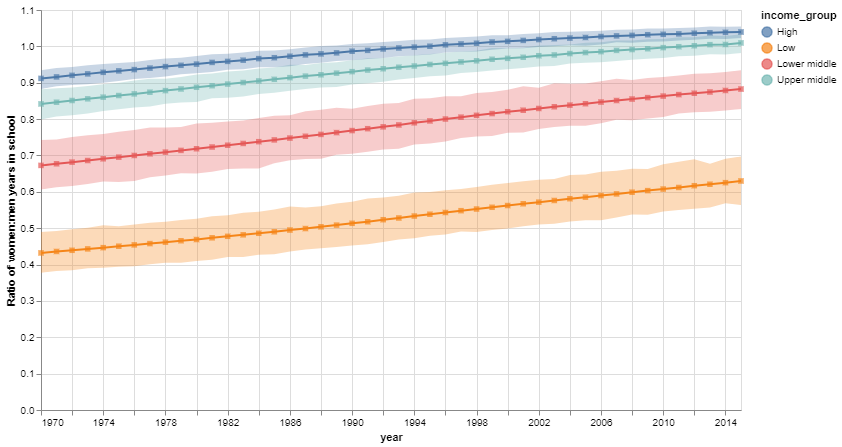

In [5]:
# YOUR PYTHON ANSWER GOES HERE

# Create a single chart variable
edu_band = edu_chart + edu_square

# Add 95% confidence interval band. Note I had to use the ungrouped dataset for it to work. 
band = alt.Chart(gm70_15).mark_errorband(extent='ci').encode(alt.X('year'), 
       alt.Y('years_in_school_w:m', title='Ratio of women:men years in school'), 
       alt.Color('income_group')).properties(width=7000, height=400)
# Display the bands on the chart. 
edu_band + band



# 4. Family planning

Another common misconception is that saving the lives of children in low income countries
will lead to overpopulation.
Rather,
lower child mortality is actually correlated with smaller family sizes.
As more children survive,
parents feel more secure with a smaller family size.
Let's have a look in the data to see how this relationship has evolved over time.

In the plots we are going to make,
it is important to note that it is not possible to tell causation,
just correlation.
However,
in the [Gapminder](https://www.gapminder.org/videos/) video library
there are a few videos on this topic
(including [this](https://www.gapminder.org/answers/will-saving-poor-children-lead-to-overpopulation/)
and [this](https://www.gapminder.org/videos/population-growth-explained-with-ikea-boxes/) one),
discussing how reducing poverty can help slow down population growth
through decreased family sizes.
Current estimates suggest that the word population
will stabilize around 11 billion people
and the average number of children per woman
will be close to two worldwide in year 2100.

<div class="alert alert-info" style="color:black">

### Question 4
rubric={accuracy:1,viz:2,reasoning:1}

<h4>
Python
</h4>
<ol type="1">
<li>Filter the data to include only the years 1918, 1938, 1958, 1978, 1998, and 2018. To do this, you need to write out the full date strings, <code>'1918-01-01'</code> etc, or use <code>pd.to_datetime</code> with <code>format=%Y</code> on a list of the year integers only, up to you which one.</li>
<li>Use filled circles to make a scatter plot with children per women on the x-axis, child mortality on the y-axis, and the circles colored by the income group.</li>
<li>Facet your data into six subplots, one for each year laid out in 3 columns and 2 rows. To avoid taking too much space, set the width and height of the plots to suitable numbers.</li>
<li>Briefly describe your interpretation of the data. Does it support what was written in the introduction to this section of the lab? Why / why not?</li>
</ol>
</div>

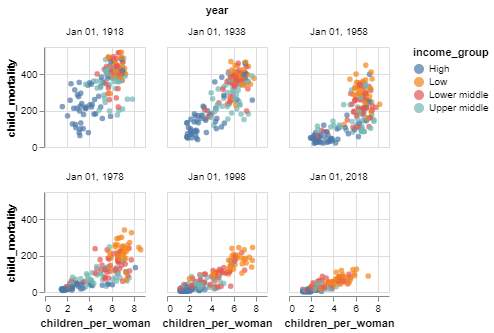

In [6]:
# YOUR PYTHON ANSWER GOES HERE

# filter the original dataframe to only include the selected years. 
gm_decades = gm[(gm.year == '1918') | (gm.year == '1938') | (gm.year == '1958') | (gm.year == '1978')
                | (gm.year == '1998') | (gm.year == '2018')]

# Create faceted chart of children per women vs. child mortality faceted by year and
# color coded by income group. 
f_chart = alt.Chart(gm_decades).mark_circle().encode(alt.X('children_per_woman'), 
          alt.Y('child_mortality'), alt.Color('income_group')
          ).properties(height=100, width=100).facet(facet='year', columns=3)
f_chart



YOUR ANSWER TO 4 GOES HERE

Our visualization shows that the child mortality rate decreased, and the children per women also decreased for all income groups as seen by the dots congregating closer to the bottom left corner of the graph over time. This does support what was written in the question introduction, although the relationship may not be as strong as I was expecting. It seems that the child mortality rate has decreased substantially, but the number of children per women has not decreased at quite the same rapid pace. It also appears that income may have a strong effect on the number of children per women (as expected) since the colors of the dots seemed to be grouped together with higher income countries having less children compared to lower income countries. 

# 5. Carbon dioxide emissions

CO2 emissions are often talked about in it's relation to climate change.
Let's explore the data to see which countries emits the most CO2 per capita
and which regions has emitted the most in total over time.

<div class="alert alert-info" style="color:black">

### Question 5
rubric={accuracy:1,quality:1,viz:2}

<h4>
Python
</h4>
<ol type="1">
<li>Filter the data to include only the most recent year when <code>'co2_per_capita'</code> was measured (it is up to you how you find out which year this is).</li>
<li>Use the data frame <code>nlargest</code> method to select the top 40 countries in CO2 production per capita for that year.</li>
<li>Since we have only one value per country per year, let’s create a bar chart to visualize it. Encode the CO2 per capita as on the x-axis, the country on the y-axis, and the region as the color.</li>
<li>Sort your bar chart so that the highest CO2 per capita is the closest to the x-axis (the bottom of the chart). <a href="https://altair-viz.github.io/gallery/bar_chart_sorted.html">Here is an example of how to sort in Altair</a>.</li>
</ol>
</div>

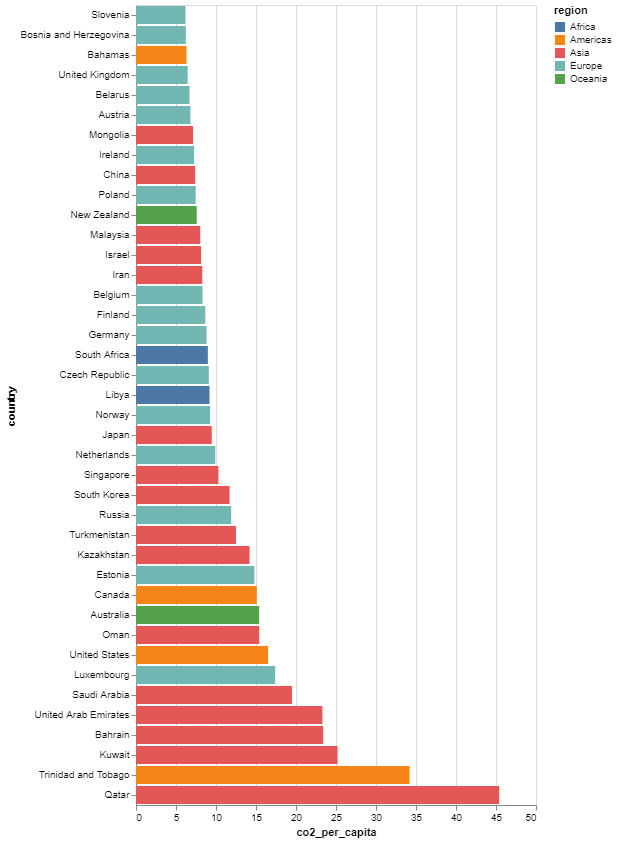

In [7]:
# YOUR PYTHON ANSWER GOES HERE

# Create a dataframe where 'co2_per_capita' is not a null value. 
gm_co2 = gm[gm['co2_per_capita'].notnull()]
# find the year latest year when 'co2_per_capita' was measured. 
target_year = gm_co2['year'].max()
# filter the dataframe to only include values for that latest year. 
gm_5 = gm[gm.year == target_year].reset_index()
# Find the 40 countries with the largest 'co2_per_capita' for that year. 
gm_5_40 = gm_5.nlargest(40, 'co2_per_capita').reset_index()
# Used this reference to help figure out how to sort
# the bar chart below: https://stackoverflow.com/questions/58244570/sorting-a-stacked-bar-chart
bar_chart = alt.Chart(gm_5_40).mark_bar().encode(alt.X('co2_per_capita'), alt.Y('country', 
            sort=alt.EncodingSortField('co2_per_capita', order='ascending')), alt.Color('region'))

bar_chart

<div class="alert alert-info" style="color:black">

### Question 5.1
rubric={accuracy:1,quality:1,viz:2}

<h4>
Python
</h4>
<ol type="1">
<li>in addition to the co2 per capita, the total population also matter for a country’s overall co2 emissions. compute a new column in your data set called <code>'co2_total'</code> which contains the total co2 emissions per observation.</li>
<li>plot this new column over time in an area chart, but instead of plotting one area for each country, plot one for each region which represents the sum of all countries co2 emissions in that region.</li>
</ol>
</div>

#### Answer explanantion:
I decided to do two area charts for this question. The first area chart is an unstacked area chart (`area_chart_unstacked`). I made this chart to clearly show how each regions total carbon dioxide emissions changed over time. The second area chart is a stacked area chart (`area_chart_stacked`). I made this chart to show how each regions share of the world's total carbon dioxide emissions changed over time. This second chart does not show how each region's individual total CO2 emission values change over time, but the area of the region compared to the year does show how much of the total carbon dioxide emissions are accounted for by each region in a given year.  

<ipython-input-8-a037a73d1e52>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gm_co2['co2_total'] = gm_co2['population'] * gm_co2['co2_per_capita']


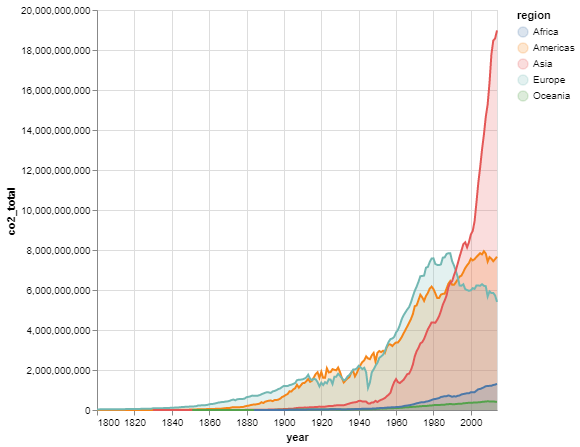

In [8]:
# YOUR PYTHON ANSWER GOES HERE
# I used the dataset with no NAN values for co2_per_capita (calculated in the first part of question 5).
# Created new column showing CO2 total emission for each data entry. 
gm_co2['co2_total'] = gm_co2['population'] * gm_co2['co2_per_capita'] 
# Grouped the dataset to show the sum of 'co2_total' for each region each year.
gm_co2_sum = gm_co2.groupby(['year', 'region'])['co2_total'].sum().reset_index()
# Created unstacked area chart (explanation in markdown cell above)
area_chart_unstacked = alt.Chart(gm_co2_sum).mark_area(opacity=0.2).encode(alt.X('year'), alt.Y('co2_total',
                       stack=None), alt.Color('region'))
# Added a line  to the chart to help to clearly differentiate the overlapping parts of the graph. 
area_line = alt.Chart(gm_co2_sum).mark_line().encode(alt.X('year'), alt.Y('co2_total'), alt.Color('region'))
# Combined the charts. 
c_area_chart = area_chart_unstacked + area_line
# Incresed the size of the chart. 
c_area_chart.properties(height=400, width=400)


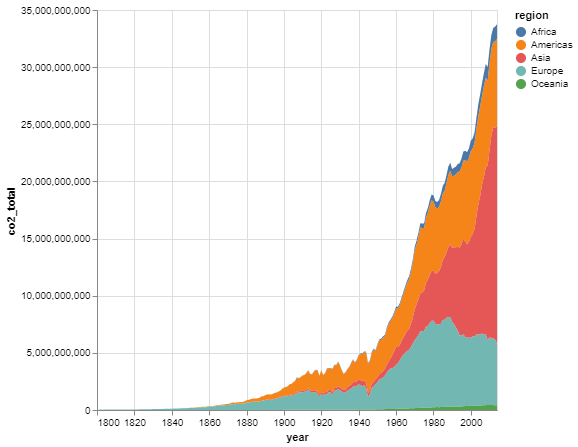

In [9]:
#stacked area chart as explained in the first markdown cell of this answer.  
stacked_area_chart = alt.Chart(gm_co2_sum).mark_area().encode(alt.X('year'), alt.Y('co2_total'), 
                     alt.Color('region')).properties(height=400, width=400)
stacked_area_chart

# 6. Income distribution

In his talk back in 2003, Rosling showed a projection of how the world income distribution would look like in 2015. Let’s eyeball if the suggested trend was accurate.

<div class="alert alert-warning" style="color:black">

### Question 6 (Optional)
rubric={accuracy:1,viz:1}

<h4>Python</h4>
<ol type="1">
<li>Wrangle your data to include the years 1979, 1991, 2003 and 2015.</li>
<li>Create a histogram (binned bar chart) of the income distribution with an appropriate number of bins.</li>
<li>Facet by year and make the plots smaller so that they fit in a single row.</li>
<li>It is a little hard to tell if the data is exactly the same as the prediction since we are not using a log scale and a histogram instead of a density plot (we’ll learn about these things later). But in general, briefly explain whether you think the trend is the same or not?</li>
</ol>
</div>

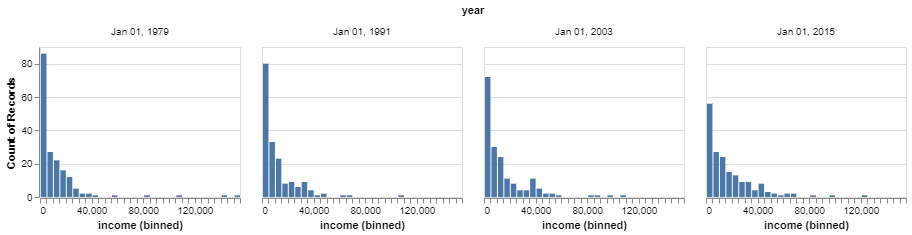

In [10]:
# YOUR PYTHON ANSWER GOES HERE

# Filtered original dataframe by selected years. 
gm_6 = gm[(gm.year == '1979') | (gm.year == '1991') | (gm.year == '2003') | (gm.year == '2015')]

# Made faceted histogram of incomes of the countries in the selected years. 
hist = alt.Chart(gm_6).mark_bar().encode(alt.X('income', bin=alt.Bin(maxbins=35)), 
       alt.Y('count()')).properties(height=150, width=200).facet(facet='year', columns=4)
hist


The histograms above do show that as the years progress, we are getting less countries in the lowest income bins, and more countries are moving towards the middle income bins. The trend does not appear nearly as drastic as it does in Dr. Rosling's talk (due to the logarithmic scale as mentioned in the question), but I do believe that the trend he mentioned is still visible in these histograms. 

# 7. Chart beautification


Let's make our charts from question 2 look more like the Gapminder bubble chart! Beautifying charts can take a long time, but it is also satisfying when you end up with a really nice looking chart in the end. We will learn more about how to create charts for communication later, but these parameters are usually enough to create basic communication charts and to help you in your data exploration.

<div class="alert alert-info" style="color:black">

### Question 7
rubric={accuracy:2,quality:1,viz:1}

<h4>
Python
</h4>
<ol type="1">
<li>Copy in your code from question 2.1 and confirm that your scatter plot is generated properly so that you didn't miss to copy anything.</li>
<li>Add a title of your choice to the chart.</li>
<li>Set the x-axis and y-axis scale so that they don’t include zero and are zoomed in to the extent of the data instead.</li>
<li>Set proper titles for the axis and the legends, which include spaces instead of underscores and are capitalized.</li>
<li>Some of the dots are really hard to see because they are so small and it is a bit difficult to distinguish the changes in size as well. Let’s make everything bigger and emphasize the size difference by using the <a href="https://altair-viz.github.io/gallery/airport_connections.html">range argument to <code>alt.Scale</code></a> (there is a lot of other things going on in this example, so just focus on how they specify <code>size</code>).</li>
<li>Enlarge the axis title font by finding and setting the <a href="https://altair-viz.github.io/user_guide/configuration.html?highlight=titlefont#axis-configuration">right parameter of <code>.configure_axis</code></a></li>
</ol>

</div>

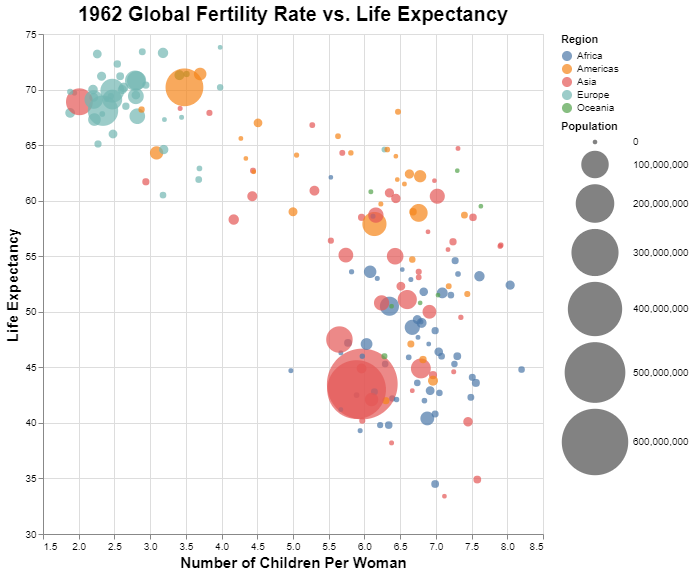

In [11]:
# YOUR PYTHON ANSWER GOES HERE

# Filtered dataframe to only include year 1962. 
gm62 = gm[gm.year == '1962']
# recreated Hans Roslings chart with adjusted scales, correct title and axis titles, changed dot sizes. 
chart = alt.Chart(gm62).mark_circle().encode(alt.X('children_per_woman', scale=alt.Scale(zero=False), 
        title='Number of Children Per Woman'), alt.Y('life_expectancy', scale=alt.Scale(zero=False), 
        title='Life Expectancy'), alt.Color('region', title='Region'), 
        alt.Size('population', title='Population', scale=alt.Scale(range=[20, 5000]))
        ).properties(title='1962 Global Fertility Rate vs. Life Expectancy', height=500, width=500
        ).configure_axis(titleFontSize=15).configure_title(fontSize=20)
        
chart


---

# Submission to Canvas

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Run All Cells...`
2. Convert your notebook to .html format using the `convert_notebook()` function below or by `File -> Export Notebook As... -> Export Notebook to HTML`
3. Submit your exported .html file to Canvas.
4. Don't forget to also push all your work (including the .ipynb file) to GitHub.